In [ ]:
pip install yfinance

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import yfinance as yf

#Importing activities

In [3]:
#Importing Data

# Defining constants and assumptions

In [281]:
# key factors anual figures
S = 1500000   #Salary
d = 0.3   # % Salary for this activity
sig = 0.5   # % d divide for EMIs & Investing activites
e = S*d*sig   # EMI paid towards loan
I = S*d*sig   # Invested into the markets
In= S*d*sig
Ioc= S*d
#Loan factors
Li = 0.08  # Loan interest rate set by the bank
Lt = 42   # Loan term time
P = 5500000   # Loan principle ammount
pplot = P
#Financial Markets
Ar = 0.09   # Anualised avrage returns from investments/markets
J =  0.08   #  % transfer from previous year investing towards current EMI

In [282]:
# Data frame
df = pd.DataFrame( columns=('EMI', 'invest', 'balance', 'investOnly'))

# Locking first row
df.loc[0] = [In,In,P,Ioc]

In [286]:
for i in range(1, Lt+1):
    e = In + (df.loc[i-1, 'invest']*J)
    I = (In + (df.loc[i-1, 'invest']*(1-J))) * (1+Ar)
    P = (df.loc[i-1, 'balance'] - e) * (1+Li)
    Io = (df.loc[i-1, 'investOnly']+Ioc)*(1+Ar)

    df.loc[i] = [e, I, P,Io]

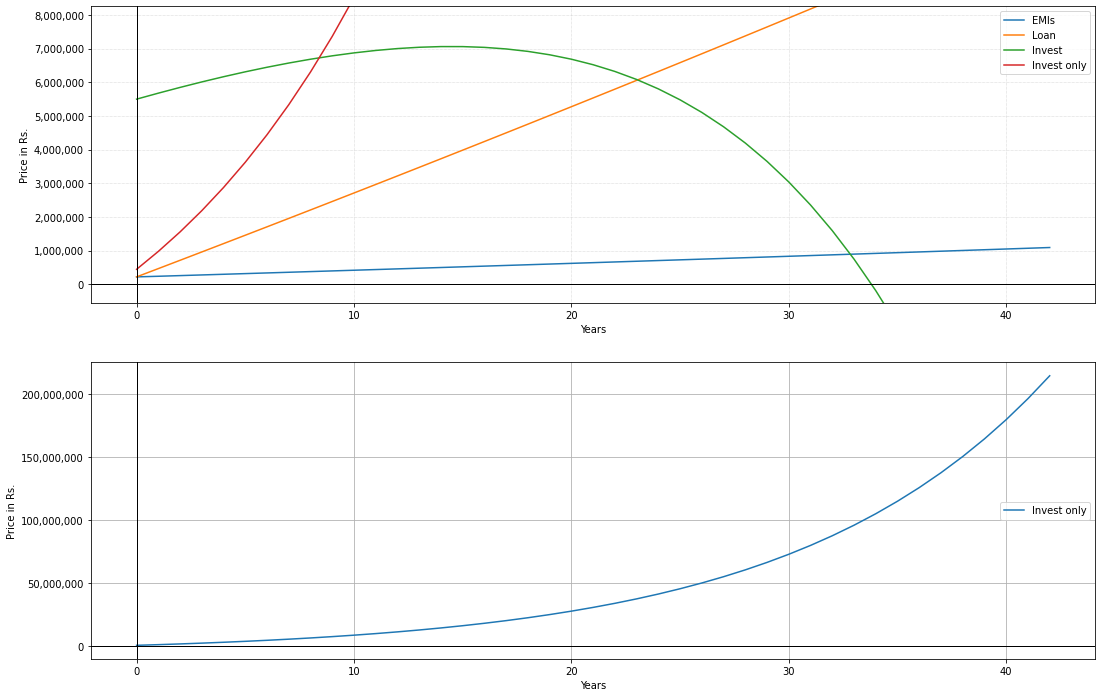

In [293]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,12))

ax[0].plot(df['EMI'], label='EMIs')
ax[0].plot(df['invest'], label='Loan')
ax[0].plot(df['balance'], label='Invest')
ax[0].plot(df['investOnly'], label='Invest only')
ax[0].axhline(y=0, color='black', linewidth=1)
ax[0].axvline(x=0, color='black', linewidth=1)
ax[0].grid(True, linestyle=':', linewidth=0.5)
ax[0].set_ylim(-pplot*0.1, pplot*1.5)
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Price in Rs.')
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].legend()

ax[1].plot(df['investOnly'], label='Invest only')
ax[1].axhline(y=0, color='black', linewidth=1)
ax[1].axvline(x=0, color='black', linewidth=1)
ax[1].grid(True)
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Price in Rs.')
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].legend()

In [289]:
df.loc[Lt]

EMI           1.096338e+06
invest        1.116747e+07
balance      -1.195429e+07
investOnly    2.147234e+08
Name: 42, dtype: float64